<a href="https://colab.research.google.com/github/nildodnjunior/mestrado_comp_ifes_ml/blob/master/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [34]:
set(y)

{0, 1, 2}

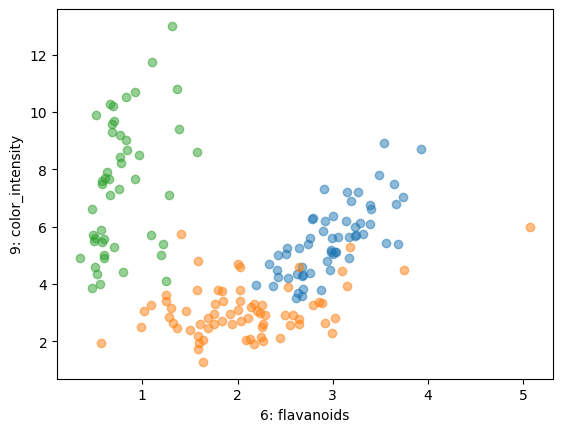

In [35]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [36]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [37]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [38]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.36375427e-04, 1.59740448e-04, 8.74996185e-05, 5.81741333e-05,
        5.57899475e-05]),
 'score_time': array([0.00291514, 0.00230694, 0.00211859, 0.00137186, 0.00136757]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[18,  3,  0],
       [ 0, 17,  2],
       [ 1,  7,  6]])

In [40]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.7281949934123847

In [41]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [42]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([1.09434128e-04, 9.25064087e-05, 6.15119934e-05, 5.60283661e-05,
        5.36441803e-05]),
 'score_time': array([0.00395465, 0.00369859, 0.00245094, 0.00217485, 0.00211334]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [43]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([1.00374222e-04, 9.39369202e-05, 6.12735748e-05, 5.86509705e-05,
        5.57899475e-05]),
 'score_time': array([0.00594044, 0.00561523, 0.00339031, 0.00340724, 0.00319624]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([9.84668732e-05, 1.04904175e-04, 6.81877136e-05, 6.60419464e-05,
        6.41345978e-05, 5.96046448e-05, 5.74588776e-05, 5.60283661e-05,
        8.65459442e-05, 8.96453857e-05, 6.96182251e-05, 5.48362732e-05,
        5.43594360e-05, 5.72204590e-05, 5.96046448e-05, 6.72340393e-05,
        5.84125519e-05, 5.74588776e-05, 5.62667847e-05, 5.84125519e-05,
        5.81741333e-05, 5.81741333e-05, 6.00814819e-05, 5.55515289e-05,
        2.64406204e-04, 5.34057617e-05, 5.43594360e-05, 5.69820404e-05,
        5.43594360e-05, 5.26905060e-05, 5.34057617e-05, 5.41210175e-05,
        5.26905060e-05, 6.84261322e-05, 5.19752502e-05, 5.48362732e-05,
        9.01222229e-05, 8.77380371e-05, 6.53266907e-05, 7.93933868e-05,
        6.10351562e-05, 5.72204590e-05, 5.65052032e-05, 6.00814819e-05,
        7.08103180e-05, 5.57899475e-05, 5.19752502e-05, 5.24520874e-05,
        5.29289246e-05, 5.62667847e-05]),
 'score_time': array([0.00885129, 0.00654125, 0.00478053, 0.00471425, 0.00469899,


In [45]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [46]:
intercepts = modelo.intercept_
intercepts

array([-105.,  114.,   19.])

In [47]:
coefs = modelo.coef_[:,[6,9]]
coefs

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

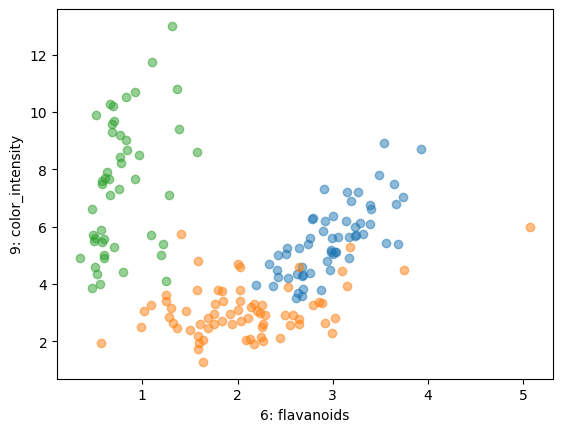

In [48]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

plt.show()

###Plotando hiperplanos separadores para classificador perceptron

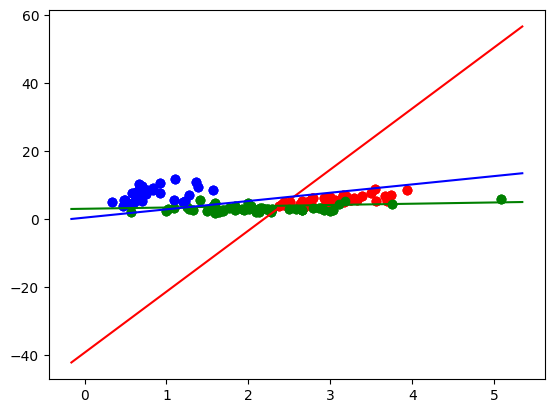

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
colors = 'rgb'

Xtr, Xte, ytr, yte = train_test_split(X[:, [6,9]], y, test_size=0.3, random_state=33)

'''
Coloquei scaler para ver se melhorava a questão dos valores de y ficarem muito grandes
mas não adiantou. Deixei comentado caso queira mudar eventualmente.

'''

# scaler = StandardScaler().fit(Xtr)
# Xtr = scaler.transform(Xtr)

# Xte = scaler.transform(Xte)

modelo = Perceptron()
modelo.fit(Xtr, ytr)

xmin, xmax = Xtr[:, 0].min() - 0.5, Xtr[:, 0].max() + 0.5
ymin, ymax = Xtr[:, 1].min() - 0.5, Xtr[:, 1].max() + 0.5
xs = np.arange(xmin,xmax,0.5)

for i in set(y):
    for j in range(len(colors)):
        px = Xtr[:, 0][ytr == j]
        py = Xtr[:, 1][ytr == j]
        plt.scatter(px, py, c=colors[j])
    ys = (-modelo.intercept_[i]-xs*modelo.coef_[i,0])/modelo.coef_[i,1]
    plt.plot(xs,ys, colors[i])

###Plotando hiperplanos separadores para classificador SGD (stochastic gradient descent)

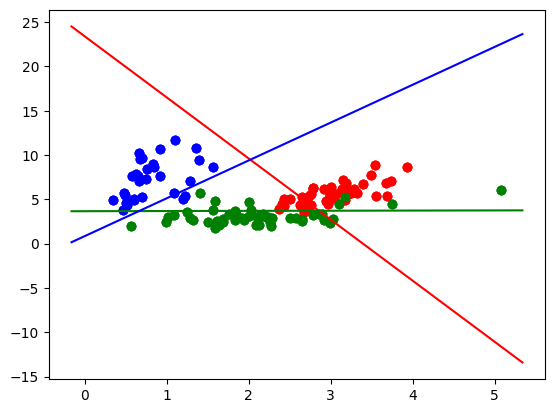

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
colors = 'rgb'

Xtr, Xte, ytr, yte = train_test_split(X[:, [6,9]], y, test_size=0.3, random_state=33)

# scaler = StandardScaler().fit(Xtr)
# Xtr = scaler.transform(Xtr)

# Xte = scaler.transform(Xte)

modelo = SGDClassifier()
modelo.fit(Xtr, ytr)

xmin, xmax = Xtr[:, 0].min() - 0.5, Xtr[:, 0].max() + 0.5
ymin, ymax = Xtr[:, 1].min() - 0.5, Xtr[:, 1].max() + 0.5
xs = np.arange(xmin, xmax, 0.5)

for i in set(y):
    for j in range(len(colors)):
        px = Xtr[:, 0][ytr == j]
        py = Xtr[:, 1][ytr == j]
        plt.scatter(px, py, c=colors[j])
    ys = (-modelo.intercept_[i]-xs*modelo.coef_[i,0])/modelo.coef_[i,1]
    plt.plot(xs,ys, colors[i])